In [1]:
import os
import os.path
import glob
import numpy as np
import Image,leargist
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn import svm

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
import sklearn_evaluation.plot as skplot
from sklearn.model_selection import learning_curve

import matplotlib.pyplot as plt
import matplotlib.cm as colormap
plt.rcParams['image.cmap'] = 'Paired'

import numpy as np
np.random.seed(1)

In [2]:
imagedir = "Datasets/malimg_paper_dataset_imgs"

In [3]:
cur_dir = os.getcwd()
os.chdir(imagedir)  # the parent folder with sub-folders

# Get number of samples per family
list_fams = sorted(os.listdir(os.getcwd()), key=str.lower)  # vector of strings with family names
no_imgs = []  # No. of samples per family
for i in range(len(list_fams)):
    os.chdir(list_fams[i])
    len1 = len(glob.glob('*.png'))  # assuming the images are stored as 'png'
    no_imgs.append(len1)
    os.chdir('..')
num_samples = np.sum(no_imgs)  # total number of all samples

# Compute the labels
y = np.zeros(num_samples)
pos = 0
label = 0
for i in no_imgs:
    print ("Label:%2d\tFamily: %15s\tNumber of images: %d" % (label, list_fams[label], i))
    for j in range(i):
        y[pos] = label
        pos += 1
    label += 1
num_classes = label

# Compute the features
X = np.zeros((num_samples, 320))
cnt = 0
list_paths = [] # List of image paths
print("Processing images ...")
for i in range(len(list_fams)):
    for img_file in glob.glob(list_fams[i]+'/*.png'):
        #print("[%d] Processing image: %s" % (cnt, img_file))
        im = Image.open(img_file)
        im1 = im.resize((64,64),Image.ANTIALIAS); # for faster computation
        des = leargist.color_gist(im1)
        X[cnt] = des[0:320]
        cnt += 1
print("Images processed: %d" %(cnt))

os.chdir(cur_dir)

Label: 0	Family:       Adialer.C	Number of images: 122
Label: 1	Family:       Agent.FYI	Number of images: 116
Label: 2	Family:       Allaple.A	Number of images: 2949
Label: 3	Family:       Allaple.L	Number of images: 1591
Label: 4	Family:   Alueron.gen!J	Number of images: 198
Label: 5	Family:       Autorun.K	Number of images: 106
Label: 6	Family:     C2LOP.gen!g	Number of images: 200
Label: 7	Family:         C2LOP.P	Number of images: 146
Label: 8	Family:  Dialplatform.B	Number of images: 177
Label: 9	Family:       Dontovo.A	Number of images: 162
Label:10	Family:        Fakerean	Number of images: 381
Label:11	Family:   Instantaccess	Number of images: 431
Label:12	Family:      Lolyda.AA1	Number of images: 213
Label:13	Family:      Lolyda.AA2	Number of images: 184
Label:14	Family:      Lolyda.AA3	Number of images: 123
Label:15	Family:       Lolyda.AT	Number of images: 159
Label:16	Family:     Malex.gen!J	Number of images: 136
Label:17	Family:   Obfuscator.AD	Number of images: 142
Label:18

In [4]:
X.shape

(9339, 320)

In [5]:
# Training top_model
C_range = np.logspace(-2, 10, 13)
param_grid = dict(C=C_range)
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=1)

top_model = GridSearchCV(svm.LinearSVC(), param_grid=param_grid, cv=cv, verbose=10, n_jobs=20)
top_model.fit(X,y)  # Training 

Fitting 5 folds for each of 13 candidates, totalling 65 fits
[CV] C=0.01 ..........................................................
[CV] C=0.01 ..........................................................
[CV] C=0.01 ..........................................................
[CV] C=0.01 ..........................................................
[CV] C=0.01 ..........................................................
[CV] C=0.1 ...........................................................
[CV] C=0.1 ...........................................................
[CV] C=0.1 ...........................................................
[CV] C=0.1 ...........................................................
[CV] C=0.1 ...........................................................
[CV] C=1.0 ...........................................................
[CV] C=1.0 ...........................................................
[CV] C=1.0 ...........................................................
[CV] C=1.0 .....

[Parallel(n_jobs=20)]: Done   1 tasks      | elapsed:   11.6s


[CV] ........................... C=0.01, score=0.624732, total=  12.0s
[CV] C=100.0 .........................................................
[CV] ........................... C=0.01, score=0.621520, total=  12.0s
[CV] ............................ C=1.0, score=0.950749, total=  11.3s
[CV] C=100.0 .........................................................
[CV] ........................... C=0.01, score=0.632227, total=  12.4s
[CV] C=100.0 .........................................................
[CV] C=100.0 .........................................................
[CV] ............................ C=0.1, score=0.895610, total=  12.1s
[CV] C=1000.0 ........................................................
[CV] ............................ C=0.1, score=0.906852, total=  12.4s
[CV] C=1000.0 ........................................................
[CV] ............................ C=0.1, score=0.899358, total=  12.7s
[CV] C=1000.0 ........................................................
[CV] .

[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:   14.1s


[CV] C=1000.0 ........................................................
[CV] ............................ C=0.1, score=0.895075, total=  13.5s
[CV] C=10000.0 .......................................................
[CV] ............................ C=1.0, score=0.955032, total=  23.1s
[CV] C=10000.0 .......................................................
[CV] ............................ C=1.0, score=0.950749, total=  23.4s
[CV] C=10000.0 .......................................................
[CV] ............................ C=1.0, score=0.959850, total=  24.9s
[CV] C=10000.0 .......................................................
[CV] ............................ C=1.0, score=0.948073, total=  25.6s
[CV] C=10000.0 .......................................................
[CV] ........................... C=10.0, score=0.953426, total=  44.8s
[CV] C=100000.0 ......................................................
[CV] .......................... C=100.0, score=0.958244, total=  47.0s
[CV] C

[Parallel(n_jobs=20)]: Done  21 tasks      | elapsed:  1.6min


[CV] .......................... C=100.0, score=0.965739, total= 1.5min
[CV] C=1000000.0 .....................................................
[CV] ......................... C=1000.0, score=0.966274, total= 1.5min
[CV] C=1000000.0 .....................................................
[CV] .......................... C=100.0, score=0.960921, total= 1.5min
[CV] C=1000000.0 .....................................................
[CV] ......................... C=1000.0, score=0.965739, total= 1.5min
[CV] C=1000000.0 .....................................................
[CV] .......................... C=100.0, score=0.961991, total= 1.5min
[CV] C=10000000.0 ....................................................
[CV] ......................... C=1000.0, score=0.973769, total= 1.5min
[CV] C=10000000.0 ....................................................
[CV] ......................... C=1000.0, score=0.967880, total= 1.5min
[CV] C=10000000.0 ....................................................
[CV] .

[Parallel(n_jobs=20)]: Done  33 out of  65 | elapsed:  1.9min remaining:  1.8min


[CV] ........................ C=10000.0, score=0.968951, total= 1.5min
[CV] C=100000000.0 ...................................................
[CV] ........................ C=10000.0, score=0.967880, total= 1.5min
[CV] C=100000000.0 ...................................................
[CV] ....................... C=100000.0, score=0.968951, total= 1.4min
[CV] C=1000000000.0 ..................................................
[CV] ....................... C=100000.0, score=0.970557, total= 1.3min
[CV] C=1000000000.0 ..................................................
[CV] ....................... C=100000.0, score=0.975375, total= 1.4min
[CV] C=1000000000.0 ..................................................
[CV] ....................... C=100000.0, score=0.964133, total= 1.4min
[CV] C=1000000000.0 ..................................................
[CV] ....................... C=100000.0, score=0.971092, total= 1.3min
[CV] C=1000000000.0 ..................................................


[Parallel(n_jobs=20)]: Done  40 out of  65 | elapsed:  2.9min remaining:  1.8min


[CV] ...................... C=1000000.0, score=0.969486, total= 1.4min
[CV] C=10000000000.0 .................................................
[CV] ...................... C=1000000.0, score=0.970557, total= 1.3min
[CV] C=10000000000.0 .................................................
[CV] ...................... C=1000000.0, score=0.966809, total= 1.3min
[CV] C=10000000000.0 .................................................
[CV] ..................... C=10000000.0, score=0.974839, total= 1.3min
[CV] C=10000000000.0 .................................................
[CV] ...................... C=1000000.0, score=0.959315, total= 1.3min
[CV] C=10000000000.0 .................................................
[CV] ..................... C=10000000.0, score=0.972163, total= 1.3min
[CV] ..................... C=10000000.0, score=0.968951, total= 1.3min
[CV] ..................... C=10000000.0, score=0.972698, total= 1.3min


[Parallel(n_jobs=20)]: Done  47 out of  65 | elapsed:  3.1min remaining:  1.2min


[CV] ...................... C=1000000.0, score=0.970021, total= 1.4min
[CV] ..................... C=10000000.0, score=0.965203, total= 1.3min
[CV] .................... C=100000000.0, score=0.973769, total= 1.3min
[CV] .................... C=100000000.0, score=0.970557, total= 1.3min
[CV] .................... C=100000000.0, score=0.970557, total= 1.3min
[CV] .................... C=100000000.0, score=0.964133, total= 1.3min


[Parallel(n_jobs=20)]: Done  54 out of  65 | elapsed:  3.2min remaining:   38.9s


[CV] .................... C=100000000.0, score=0.968951, total= 1.2min
[CV] ................... C=1000000000.0, score=0.972698, total= 1.1min
[CV] ................... C=1000000000.0, score=0.971627, total= 1.0min
[CV] ................... C=1000000000.0, score=0.966809, total=  34.2s
[CV] .................. C=10000000000.0, score=0.971092, total=  25.5s
[CV] ................... C=1000000000.0, score=0.968415, total=  35.1s
[CV] ................... C=1000000000.0, score=0.970557, total=  38.8s


[Parallel(n_jobs=20)]: Done  61 out of  65 | elapsed:  3.5min remaining:   13.8s


[CV] .................. C=10000000000.0, score=0.966274, total=  30.1s
[CV] .................. C=10000000000.0, score=0.973769, total=  31.2s
[CV] .................. C=10000000000.0, score=0.965739, total=  28.0s
[CV] .................. C=10000000000.0, score=0.968951, total=  28.6s


[Parallel(n_jobs=20)]: Done  65 out of  65 | elapsed:  3.5min finished


GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=1, test_size=0.2,
            train_size=None),
       error_score='raise',
       estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0),
       fit_params={}, iid=True, n_jobs=20,
       param_grid={'C': array([  1.00000e-02,   1.00000e-01,   1.00000e+00,   1.00000e+01,
         1.00000e+02,   1.00000e+03,   1.00000e+04,   1.00000e+05,
         1.00000e+06,   1.00000e+07,   1.00000e+08,   1.00000e+09,
         1.00000e+10])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=10)

In [6]:
print("Best parameters: %s - score: %0.4f" % (top_model.best_params_, top_model.best_score_))

Best parameters: {'C': 10000000.0} - score: 0.9708


In [7]:
top_model.cv_results_

{'mean_fit_time': array([ 12.15352087,  12.70549579,  21.62724767,  80.57340021,
         83.27157397,  91.71585617,  89.31553526,  82.29110627,
         79.83032722,  78.86045275,  76.34534864,  46.89420147,  28.68122778]),
 'mean_score_time': array([ 0.02978897,  0.02884202,  0.02122693,  0.02369461,  0.01523724,
         0.02172546,  0.01344719,  0.01404243,  0.0138988 ,  0.01624923,
         0.01064773,  0.00747299,  0.00616422]),
 'mean_test_score': array([ 0.62591006,  0.89828694,  0.95289079,  0.95845824,  0.9630621 ,
         0.96970021,  0.96927195,  0.97002141,  0.96723769,  0.97077088,
         0.96959315,  0.97002141,  0.96916488]),
 'mean_train_score': array([ 0.62484273,  0.89722929,  0.95711417,  0.97269442,  0.98425914,
         0.99502075,  0.99140677,  0.99378932,  0.99191541,  0.9959577 ,
         0.9954223 ,  0.99274528,  0.9954223 ]),
 'param_C': masked_array(data = [0.01 0.10000000000000001 1.0 10.0 100.0 1000.0 10000.0 100000.0 1000000.0
  10000000.0 100000000.0 

In [8]:
top_model.grid_scores_

/usr/local/lib/python2.7/dist-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.62591, std: 0.00359, params: {'C': 0.01},
 mean: 0.89829, std: 0.00461, params: {'C': 0.10000000000000001},
 mean: 0.95289, std: 0.00413, params: {'C': 1.0},
 mean: 0.95846, std: 0.00404, params: {'C': 10.0},
 mean: 0.96306, std: 0.00360, params: {'C': 100.0},
 mean: 0.96970, std: 0.00384, params: {'C': 1000.0},
 mean: 0.96927, std: 0.00184, params: {'C': 10000.0},
 mean: 0.97002, std: 0.00363, params: {'C': 100000.0},
 mean: 0.96724, std: 0.00417, params: {'C': 1000000.0},
 mean: 0.97077, std: 0.00336, params: {'C': 10000000.0},
 mean: 0.96959, std: 0.00315, params: {'C': 100000000.0},
 mean: 0.97002, std: 0.00214, params: {'C': 1000000000.0},
 mean: 0.96916, std: 0.00300, params: {'C': 10000000000.0}]

In [9]:
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=1)
svm_model = svm.SVC(C=top_model.best_params_['C'])
train_sizes = np.linspace(.1, 1.0, 10)
train_sizes, train_scores, test_scores = learning_curve(svm_model, X, y, cv=cv, n_jobs=20, train_sizes=train_sizes)

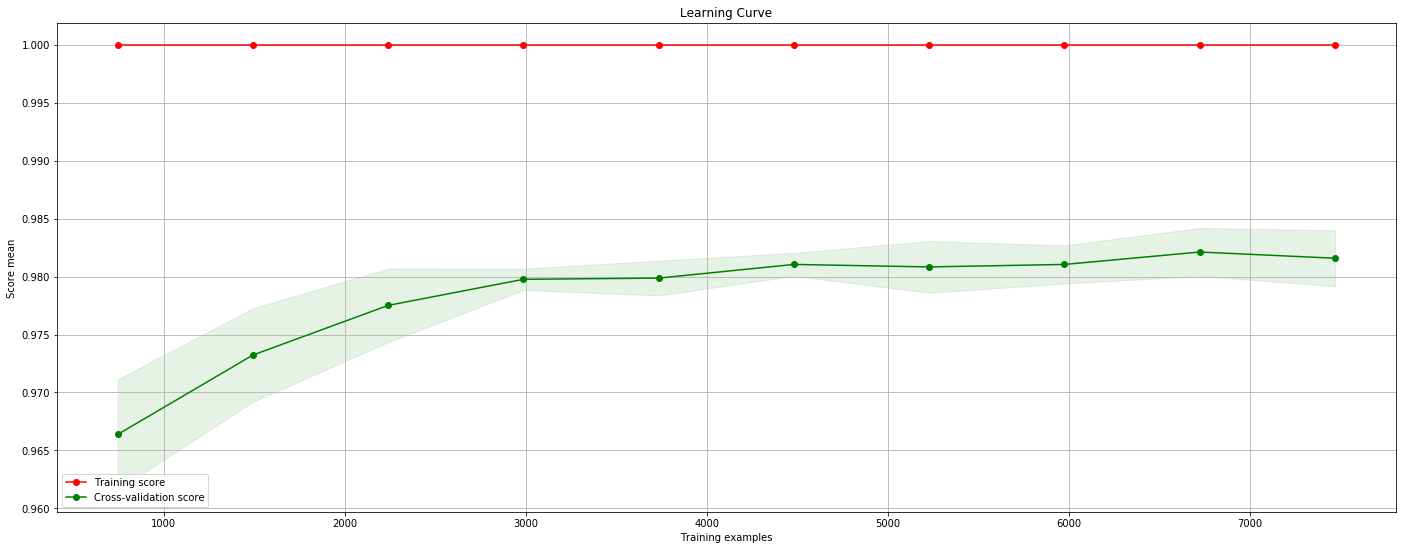

In [10]:
figure = plt.gcf()
figure.set_size_inches(24, 9)
skplot.learning_curve(train_scores, test_scores, train_sizes)
plt.show()